In [65]:
import pandas as pd
import matplotlib.pyplot as plt

In [66]:
data = pd.read_csv('players.csv')

In [67]:
data.columns

Index(['Unnamed: 0', 'active_from', 'active_to', 'birth_date', 'college',
       'height', 'name', 'position', 'url', 'weight', 'NBA__3ptapg',
       'NBA__3ptpct', 'NBA__3ptpg', 'NBA_efgpct', 'NBA_fg%', 'NBA_fg_per_game',
       'NBA_fga_per_game', 'NBA_ft%', 'NBA_ft_per_g', 'NBA_fta_p_g',
       'NBA_g_played', 'NBA_ppg', 'NCAA__3ptapg', 'NCAA__3ptpct',
       'NCAA__3ptpg', 'NCAA_efgpct', 'NCAA_fgapg', 'NCAA_fgpct', 'NCAA_fgpg',
       'NCAA_ft', 'NCAA_ftapg', 'NCAA_ftpg', 'NCAA_games', 'NCAA_ppg'],
      dtype='object')

In [68]:
#no data for NCAA efg%, lots of missing data for nba efg %; two unnecessary cols
data.drop(columns=['NCAA_efgpct','NBA_efgpct','url','Unnamed: 0'], inplace=True)

In [69]:
#drop rows without ncaa data
data.dropna(subset=['NCAA_games'], inplace=True)

In [70]:
#null values in 3 point columns - assuming this means 0
#going to leave the 3 point percentage columns as nan because it's 0/0
data.loc[data['NBA__3ptapg'].isnull(),'NBA__3ptapg']=0
data.loc[data['NBA__3ptpg'].isnull(),'NBA__3ptpg']=0
data.loc[data['NCAA__3ptapg'].isnull(),'NCAA__3ptapg']=0
data.loc[data['NCAA_ftapg'].isnull(),'NCAA_ftapg']=0
data.loc[data['NCAA_fgapg'].isnull(),'NCAA_fgapg']=0
data.loc[data['NCAA__3ptpg'].isnull(),'NCAA__3ptpg']=0
data.loc[data['NCAA_ft'].isnull(),'NCAA_ft']=0

In [71]:
#columns with missing values - to be aware of
for c in data.columns:
    if sum(data[c].isna())>0:
        print(c)
        print(sum(data[c].isna()))

NBA__3ptpct
372
NBA_fg%
15
NBA_ft%
111
NCAA__3ptpct
872
NCAA_fgpct
16


In [72]:
recent = data[data['active_from']>2004]

In [73]:
recent.describe()

active_from    active_to      weight  NBA__3ptapg  NBA__3ptpct  \
count    889.00000   889.000000  889.000000   889.000000   782.000000   
mean    2012.03712  2015.232846  217.103487     1.415298     0.279762   
std        4.09237     3.672518   25.707434     1.420773     0.138650   
min     2005.00000  2005.000000  150.000000     0.000000     0.000000   
25%     2008.00000  2013.000000  200.000000     0.200000     0.231000   
50%     2012.00000  2017.000000  215.000000     1.000000     0.313500   
75%     2016.00000  2018.000000  235.000000     2.300000     0.357000   
max     2018.00000  2018.000000  360.000000     7.800000     1.000000   

       NBA__3ptpg     NBA_fg%  NBA_fg_per_game  NBA_fga_per_game     NBA_ft%  \
count  889.000000  880.000000       889.000000        889.000000  825.000000   
mean     0.472216    0.422388         2.242520          5.160292    0.707286   
std      0.532654    0.109929         1.681635          3.594460    0.148962   
min      0.000000    0.000000         0.000000          0.000000    0.000000   
25%      0.000000    0.385000         1.000000          2.500000    0.643000   
50%      0.300000    0.429000         1.800000          4.300000    0.729000   
75%      0.700000    0.469000         3.100000          7.000000    0.798000   
max      3.400000    1.000000         9.200000         18.800000    1.000000   

       ...  NCAA__3ptpct  NCAA__3ptpg  NCAA_fgapg  NCAA_fgpct   NCAA_fgpg  \
count  ...    831.000000   889.000000  889.000000  889.000000  889.000000   
mean   ...      0.329741     0.926097    9.232283    0.481120    4.378403   
std    ...      0.118056     0.779188    2.820198    0.060753    1.269100   
min    ...      0.000000     0.000000    1.900000    0.357000    1.100000   
25%    ...      0.306500     0.200000    7.200000    0.437000    3.500000   
50%    ...      0.349000     0.900000    9.200000    0.466000    4.400000   
75%    ...      0.378000     1.500000   11.100000    0.522000    5.200000   
max    ...      1.000000     4.000000   20.400000    0.676000    9.300000   

          NCAA_ft  NCAA_ftapg   NCAA_ftpg  NCAA_games    NCAA_ppg  
count  889.000000  889.000000  889.000000  889.000000  889.000000  
mean     0.715201    3.775366    2.715636   96.564679   12.400900  
std      0.088881    1.443934    1.123446   35.764220    3.744708  
min      0.295000    0.500000    0.300000   11.000000    2.700000  
25%      0.663000    2.800000    1.900000   68.000000    9.800000  
50%      0.725000    3.700000    2.600000  103.000000   12.500000  
75%      0.779000    4.600000    3.400000  128.000000   14.900000  
max      0.946000    9.400000    7.400000  152.000000   26.600000  

[8 rows x 25 columns]

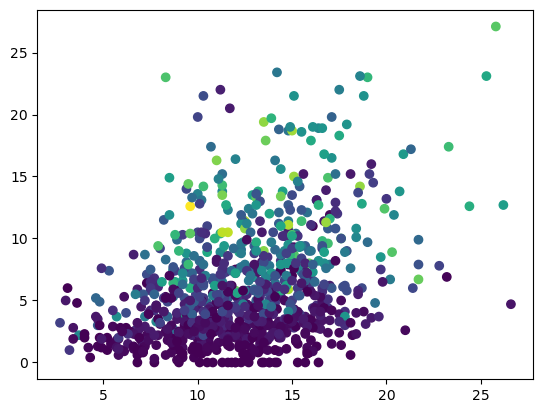

In [74]:
plt.scatter(recent['NCAA_ppg'], recent['NBA_ppg'], c=recent['NBA_g_played'])

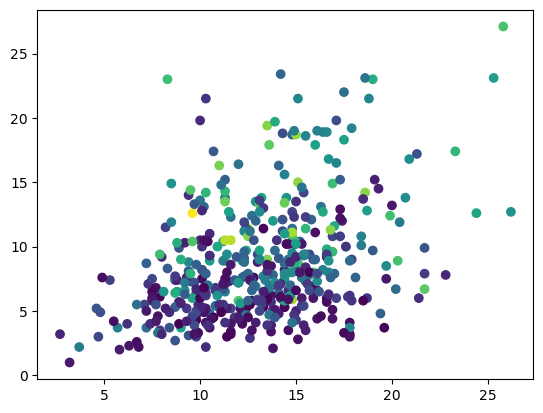

In [75]:
#when filtered by a significant # of games relationship becomes more clear
#maybe a good thing to try to predict is # of NBA games (by category, like <20 or 100-150 - not exact) 
#a player will participate in
#this also doesn't have any defense data

top50_recent=recent.loc[recent['NBA_g_played']>100,:]
plt.scatter(top50_recent['NCAA_ppg'], top50_recent['NBA_ppg'], c=top50_recent['NBA_g_played'])